# **Space X  Falcon 9 First Stage Landing Prediction**


by Andrew Hagan
kappapb@gmail.com

Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if I can determine if the first stage will land, I can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   Most unsuccessful landings are planned.  In this project I will apply the machine learning classifier models to the Falcon 9 data and check their accuraccy.

## Objectives


Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the that method performs best using test data

This data was scraped from the SpaceX website using Beautiful Soup.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score

Load the data


In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/kappapb/Case_Study-SpaceX/main/falcon9launchdata1.csv")
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [3]:
data['LaunchSite'].value_counts()

CCAFS SLC 40    55
KSC LC 39A      22
VAFB SLC 4E     13
Name: LaunchSite, dtype: int64

In [4]:
X = pd.read_csv('https://raw.githubusercontent.com/kappapb/Case_Study-SpaceX/main/falcon9launchdata2.csv')
X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


Here we create a numpy array our of the 'Class' column in our data

In [5]:
Y = data['Class'].to_numpy()
Y

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

Here I standardize the data so it will work in the classifier system.

In [6]:
X = preprocessing.StandardScaler().fit_transform(X)

Now I will split that data for integrity.

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=2)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (72, 83) (72,)
Test set: (18, 83) (18,)


Here's my Logistic Regression model with GridSearchCV function 


In [8]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [9]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr = LogisticRegression().fit(X_train,Y_train)
logreg_cv = GridSearchCV(lr, parameters, cv=10)
logreg_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [10]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8464285714285713


In [11]:
logreg_cv.score(X_test, Y_test)

0.8333333333333334

Now I will try the Support Vector Machines model with parameters input by GridSearchCV function

In [12]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [13]:
svm_cv = GridSearchCV(svm, parameters, cv=10)
svm_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [14]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.8482142857142856


In [15]:
svm_cv.score(X_test, Y_test)

0.8333333333333334

This is the Decision Tree Classifier with GridSearchCV


In [16]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [17]:
tree_cv = GridSearchCV(tree, parameters, cv=10)
tree_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [18]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 12, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'splitter': 'random'}
accuracy : 0.8875


In [19]:
tree_cv.score(X_test, Y_test)

0.8333333333333334

Lastly, I will input the parameters for the K Nearest Neighbors model to be input with GridSearchCV

In [20]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [21]:
knn_cv = GridSearchCV(KNN, parameters, cv=10)
knn_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [22]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy : 0.8482142857142858


In [23]:
knn_cv.score(X_test, Y_test)

0.8333333333333334

Now I will start intensive score evaluation to find the best model.

In [24]:
yhat_train_svm = svm_cv.predict(X_train)
yhat_test_svm = svm_cv.predict(X_test)

SVM_f1_train = f1_score(Y_train, yhat_train_svm, average='weighted') 
SVM_jaccard_train = jaccard_score(Y_train, yhat_train_svm,pos_label=1)
print("SVM F1 Train score: ", SVM_f1_train)
print("SVM Jaccard Train score: ", SVM_jaccard_train)
SVM_f1_test = f1_score(Y_test, yhat_test_svm, average='weighted') 
SVM_jaccard_test = jaccard_score(Y_test, yhat_test_svm,pos_label=1)
print("SVM F1 Test score: ", SVM_f1_test)
print("SVM Jaccard Test score: ", SVM_jaccard_test)

SVM F1 Train score:  0.882051282051282
SVM Jaccard Train score:  0.8571428571428571
SVM F1 Test score:  0.8148148148148149
SVM Jaccard Test score:  0.8


Here I calculate 3 different stats scores: F1, Jaccard, and R2 for both test and train data and average them to come up with the total score for the model.

SVM Total score:  0.8460385293718627
Logistic Regression Total score:  0.8385312462066848
KNN Total score:  0.8310641275553556
Decision Tree Total score:  0.8236428056830355


[Text(0.5, 1.0, 'Total Accuracy Score by Model')]

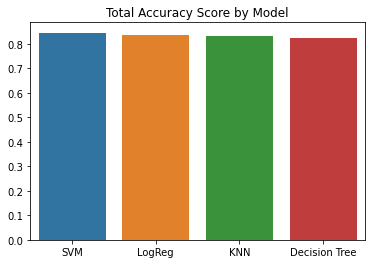

In [25]:
yhat_train_svm = svm_cv.predict(X_train)
yhat_test_svm = svm_cv.predict(X_test)
SVM_f1_train = f1_score(Y_train, yhat_train_svm, average='weighted') 
SVM_jaccard_train = jaccard_score(Y_train, yhat_train_svm,pos_label=1)
SVM_f1_test = f1_score(Y_test, yhat_test_svm, average='weighted') 
SVM_jaccard_test = jaccard_score(Y_test, yhat_test_svm,pos_label=1)

yhat_train_tree = tree_cv.predict(X_train)
yhat_test_tree = tree_cv.predict(X_test)
tree_f1_train = f1_score(Y_train, yhat_train_tree, average='weighted') 
tree_jaccard_train = jaccard_score(Y_train, yhat_train_tree,pos_label=1)
tree_f1_test = f1_score(Y_test, yhat_test_tree, average='weighted') 
tree_jaccard_test = jaccard_score(Y_test, yhat_test_tree,pos_label=1)

yhat_train_knn = knn_cv.predict(X_train)
yhat_test_knn = knn_cv.predict(X_test)
knn_f1_train = f1_score(Y_train, yhat_train_knn, average='weighted') 
knn_jaccard_train = jaccard_score(Y_train, yhat_train_knn,pos_label=1)
knn_f1_test = f1_score(Y_test, yhat_test_knn, average='weighted') 
knn_jaccard_test = jaccard_score(Y_test, yhat_test_knn,pos_label=1)

yhat_train_logreg = logreg_cv.predict(X_train)
yhat_test_logreg = logreg_cv.predict(X_test)
logreg_f1_train = f1_score(Y_train, yhat_train_logreg, average='weighted') 
logreg_jaccard_train = jaccard_score(Y_train, yhat_train_logreg,pos_label=1)
logreg_f1_test = f1_score(Y_test, yhat_test_svm, average='weighted') 
logreg_jaccard_test = jaccard_score(Y_test, yhat_test_svm,pos_label=1)

svm_total_score = ((metrics.accuracy_score(Y_train, yhat_train_svm))+ (metrics.accuracy_score(Y_test, yhat_test_svm))+SVM_f1_train+SVM_jaccard_train+SVM_f1_test+SVM_jaccard_test)/6
tree_total_score = ((metrics.accuracy_score(Y_train, yhat_train_tree))+ (metrics.accuracy_score(Y_test, yhat_test_tree))+tree_f1_train+tree_jaccard_train+tree_f1_test+tree_jaccard_test)/6
KNN_total_score = ((metrics.accuracy_score(Y_train, yhat_train_knn))+ (metrics.accuracy_score(Y_test, yhat_test_knn))+knn_f1_train+knn_jaccard_train+knn_f1_test+knn_jaccard_test)/6
logreg_total_score = ((metrics.accuracy_score(Y_train, yhat_train_logreg))+ (metrics.accuracy_score(Y_test, yhat_test_logreg))+logreg_f1_train+logreg_jaccard_train+logreg_f1_test+logreg_jaccard_test)/6

print("SVM Total score: ", svm_total_score)
print("Logistic Regression Total score: ", logreg_total_score)
print("KNN Total score: ", KNN_total_score)
print("Decision Tree Total score: ", tree_total_score)
d = {'SVM': [svm_total_score], 'LogReg': [logreg_total_score], 'KNN': [KNN_total_score],'Decision Tree': [tree_total_score]}
df = pd.DataFrame(data=d)
sns.barplot(data=(df)).set(title='Total Accuracy Score by Model')



In conclusion, it was a close race, but Support Vector Machines was the winner.  Decision Tree Classifier was last place.

[Text(0.5, 1.0, 'Total Accuracy Score by Model')]

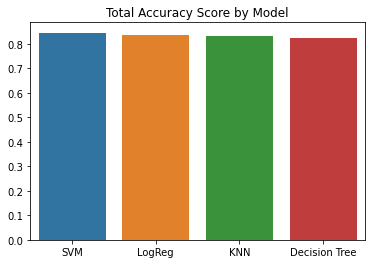

In [26]:
d = {'SVM': [svm_total_score], 'LogReg': [logreg_total_score], 'KNN': [KNN_total_score],'Decision Tree': [tree_total_score]}
df = pd.DataFrame(data=d)
sns.barplot(data=(df)).set(title='Total Accuracy Score by Model')